In [1]:
#getting Working directory path!

import os
import pandas as pd
os.getcwd()

'C:\\Users\\yogesh\\OneDrive\\Desktop\\python'

In [2]:
Data=pd.read_excel('DATUM EXCEL.xlsx')

In [3]:
#There is no null values in the dataset!
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Materials                  130 non-null    object 
 1   Condition                  130 non-null    object 
 2   Temperature(c) Heating     130 non-null    int64  
 3   Temperature(c) annealed    130 non-null    int64  
 4   Temperature(c) aged        130 non-null    int64  
 5   Temperature (c) ST         130 non-null    int64  
 6   Carbon                     130 non-null    float64
 7   Hydrogen                   130 non-null    float64
 8   Iron                       130 non-null    float64
 9   Nickel                     130 non-null    float64
 10  Nitrogen                   130 non-null    float64
 11  Oxygen                     130 non-null    float64
 12  Rutherium                  130 non-null    int64  
 13  Titanium                   130 non-null    float64

In [4]:
#since this is the dataset of material properties so outliers will be less
Data.describe()

Temperature(c) Heating  Temperature(c) annealed  Temperature(c) aged  \
count              130.000000               130.000000           130.000000   
mean                47.376923               148.923077           243.423077   
std                123.384021               321.823164           271.426061   
min                  0.000000                 0.000000             0.000000   
25%                  0.000000                 0.000000             0.000000   
50%                  0.000000                 0.000000             0.000000   
75%                  0.000000                 0.000000           540.000000   
max                540.000000              1400.000000           705.000000   

       Temperature (c) ST      Carbon    Hydrogen        Iron      Nickel  \
count          130.000000  130.000000  130.000000  130.000000  130.000000   
mean           411.769231    0.056538    0.014390    0.527692    0.036923   
std            415.325529    0.039409    0.022361    0.770006    0.173602   
min              0.000000    0.000000    0.000000    0.000000    0.000000   
25%              0.000000    0.000000    0.000000    0.200000    0.000000   
50%            365.000000    0.050000    0.015000    0.300000    0.000000   
75%            811.250000    0.100000    0.015000    0.475000    0.000000   
max           1065.000000    0.100000    0.200000    6.000000    0.900000   

         Nitrogen      Oxygen  ...     Silicon     Bismuth      Copper  \
count  130.000000  130.000000  ...  130.000000  130.000000  130.000000   
mean     0.035915    0.165123  ...    0.011154    0.002692    0.016923   
std      0.040404    0.110189  ...    0.071600    0.030697    0.123664   
min      0.000000    0.000000  ...    0.000000    0.000000    0.000000   
25%      0.000000    0.120000  ...    0.000000    0.000000    0.000000   
50%      0.030000    0.160000  ...    0.000000    0.000000    0.000000   
75%      0.050000    0.200000  ...    0.000000    0.000000    0.000000   
max      0.300000    0.500000  ...    0.700000    0.350000    1.000000   

            Boron     Yttrium      Sulfur  Elastic Modulus (GPA)  \
count  130.000000  130.000000  130.000000             130.000000   
mean     0.001154    0.000192    0.000462             105.184615   
std      0.005792    0.000965    0.002106              10.998911   
min      0.000000    0.000000    0.000000              59.000000   
25%      0.000000    0.000000    0.000000             102.700000   
50%      0.000000    0.000000    0.000000             105.000000   
75%      0.000000    0.000000    0.000000             111.575000   
max      0.030000    0.005000    0.010000             124.000000   

       Ultimate Tensile(MPA)  Yield strength(MPA) (Max)  Elongation(%)  
count             130.000000                 130.000000     130.000000  
mean              912.876923                 833.584615      15.233077  
std               401.763265                 397.341315       8.391130  
min               103.000000                  62.000000       0.000000  
25%               637.500000                 519.250000       8.000000  
50%               965.000000                 900.000000      15.000000  
75%              1200.000000                1120.000000      20.000000  
max              1700.000000                1620.000000      40.000000  

[8 rows x 31 columns]

In [5]:
Data=Data.drop(columns=['Materials'])
Data.shape

(130, 32)

In [6]:
# Dropping duplicates!

Data=Data.drop_duplicates()
Data.shape

(130, 32)

In [7]:
#Spelling mistakes occured!

Data['Condition'].value_counts()

STA         55
annealed    22
Heating     16
ST          12
pure        10
Pure         9
aged         4
annelaed     2
Name: Condition, dtype: int64

In [8]:
#Correcting the spelling mistakes!

import numpy as np
Data['Condition']=np.where(Data['Condition']=='annelaed','annealed',Data['Condition'])
Data['Condition']=np.where(Data['Condition']=='Pure','pure',Data['Condition'])

In [9]:
Data['Condition'].value_counts()

STA         55
annealed    24
pure        19
Heating     16
ST          12
aged         4
Name: Condition, dtype: int64

In [10]:
#creating dummy variables to facilitate modelling!

Data=pd.get_dummies(Data)
Data.shape

(130, 37)

<AxesSubplot:>

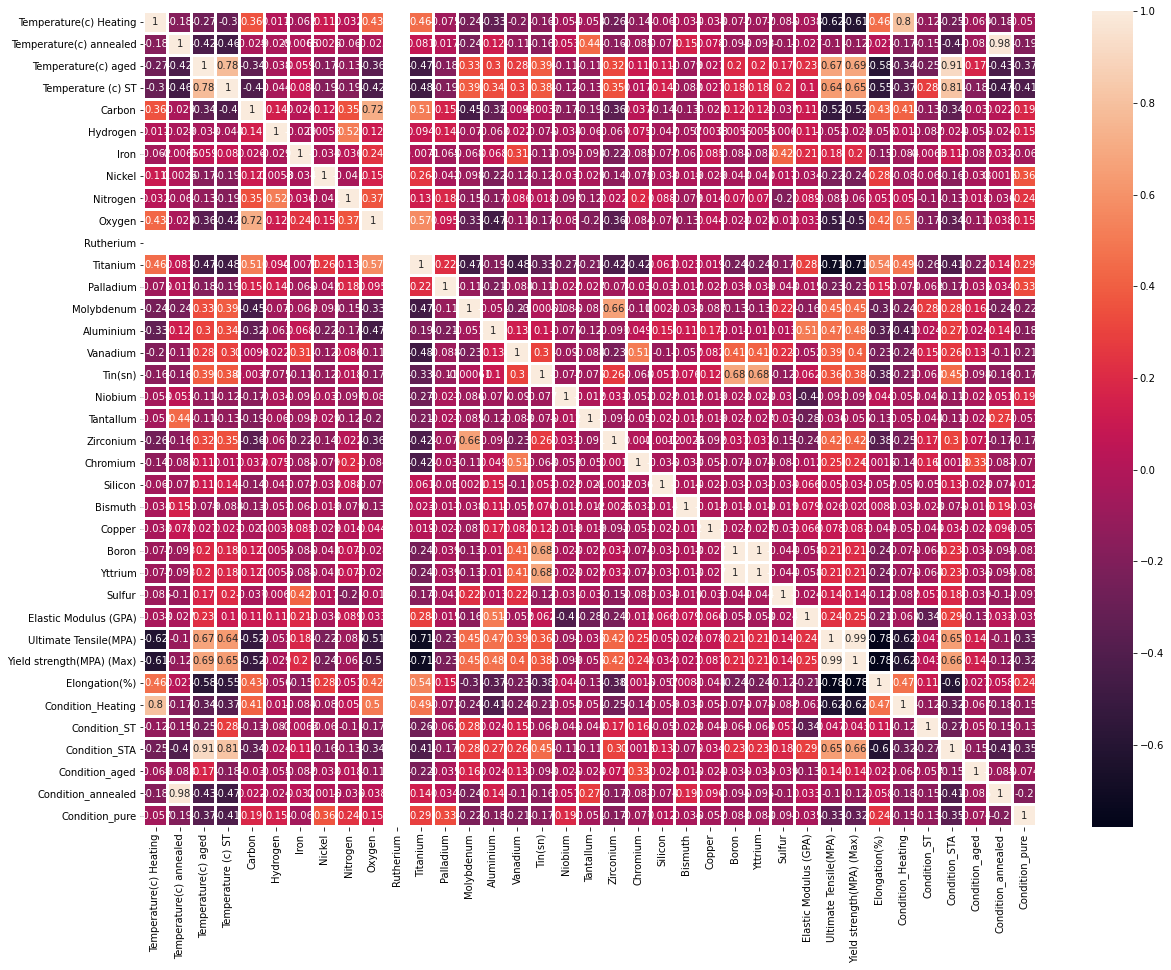

In [11]:
#correlation of variables in dataset, through this heatmap it seems there is no multicollinearity present in the dataset
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
corr=Data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,linewidths=2,annot=True)

In [12]:
x=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y1=Data['Elastic Modulus (GPA)']

In [13]:
print(x.shape)
print(y1.shape)

(130, 33)
(130,)


In [14]:
#LINEARREGRESSION

from sklearn.model_selection import train_test_split
from sklearn import metrics
x1train,x1test,y1train,y1test=train_test_split(x,y1,test_size=0.2)

In [15]:
print(x1train.shape)
print(y1train.shape)
print(x1test.shape)
print(y1test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [16]:
import statsmodels.api as sm
mod=sm.OLS(y1train,x1train).fit()

In [17]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Elastic Modulus (GPA)   R-squared:                       0.795
Model:                               OLS   Adj. R-squared:                  0.711
Method:                    Least Squares   F-statistic:                     9.426
Date:                   Sun, 30 Oct 2022   Prob (F-statistic):           3.82e-15
Time:                           20:36:55   Log-Likelihood:                -319.72
No. Observations:                    104   AIC:                             701.4
Df Residuals:                         73   BIC:                             783.4
Df Model:                             30                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(c) Heating     -0.0033      0.009     -0.360      0.720      -0.022       0.015
Temperature(c) annealed     0.0032      0.017      0.191      0.849      -0.030       0.037
Temperature(c) aged         0.0042      0.011      0.379      0.706      -0.018       0.026
Temperature (c) ST         -0.0071      0.009     -0.790      0.432      -0.025       0.011
Carbon                     53.7008     29.491      1.821      0.073      -5.075     112.477
Hydrogen                   -3.0824     46.665     -0.066      0.948     -96.086      89.922
Iron                        3.1925      1.332      2.396      0.019       0.537       5.848
Nickel                      1.0474      5.650      0.185      0.853     -10.213      12.308
Nitrogen                   31.8664     39.944      0.798      0.428     -47.741     111.474
Oxygen                    -18.2011     13.284     -1.370      0.175     -44.676       8.274
Rutherium                2.137e-11   3.57e-11      0.599      0.551   -4.97e-11    9.25e-11
Titanium                   -0.3203      0.623     -0.514      0.609      -1.562       0.922
Palladium                  14.2122     26.864      0.529      0.598     -39.327      67.751
Molybdenum                 -0.0563      0.815     -0.069      0.945      -1.680       1.567
Aluminium                   1.4223      0.622      2.286      0.025       0.182       2.662
Vanadium                   -1.5588      0.565     -2.760      0.007      -2.684      -0.433
Tin(sn)                     0.2096      0.927      0.226      0.822      -1.638       2.057
Niobium                    -1.1366      0.607     -1.872      0.065      -2.346       0.073
Tantallum                  -1.1571      0.732     -1.580      0.118      -2.617       0.302
Zirconium                  -2.3827      0.535     -4.453      0.000      -3.449      -1.316
Chromium                    1.5761      1.057      1.491      0.140      -0.530       3.682
Silicon                    -9.8939      9.471     -1.045      0.300     -28.770       8.982
Bismuth                     7.1834     20.012      0.359      0.721     -32.700      47.067
Copper                     -2.0299      4.940     -0.411      0.682     -11.875       7.815
Boron                      86.2618    171.460      0.503      0.616    -255.458     427.981
Yttrium                    14.3770     28.577      0.503      0.616     -42.576      71.330
Sulfur                   -222.0078    423.216     -0.525      0.601   -1065.476     621.460
Condition_Heating         133.9999     60.546      2.213      0.030      13.332     254.668
Condition_ST              128.1888     63.292      2.025      0.046       2.049     254.329
Condition_STA             142.8612     62.723      2.278      0.026      17.854     267.868
Condition_aged

In [18]:
predicted1=mod.predict(x1test)

In [19]:
data1=list(zip(y1test,predicted1))
comparison1=pd.DataFrame(data1,columns=['Actual1','Predicted1'])
print(comparison1)

    Actual1  Predicted1
0     115.0  114.634752
1     102.7  104.459655
2     113.8  121.302770
3     113.8  111.830098
4     107.0  119.178446
5     120.0  121.116233
6      78.0   83.615643
7     103.0  101.996323
8     105.0  106.677291
9     104.1  102.223478
10    100.0  125.439163
11    103.0  102.247655
12    110.0  108.407028
13    103.4  102.782027
14    105.0   99.951967
15    110.0  113.411928
16    102.7  104.826733
17    120.0  123.634136
18    104.1  102.590556
19     94.0  109.751482
20    110.0   90.910026
21    103.0  109.823252
22    103.0  102.017779
23    105.0  106.556094
24    102.7  103.604343
25    100.0   84.907934


In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(y1test,predicted1))

<function matplotlib.pyplot.show(close=None, block=None)>

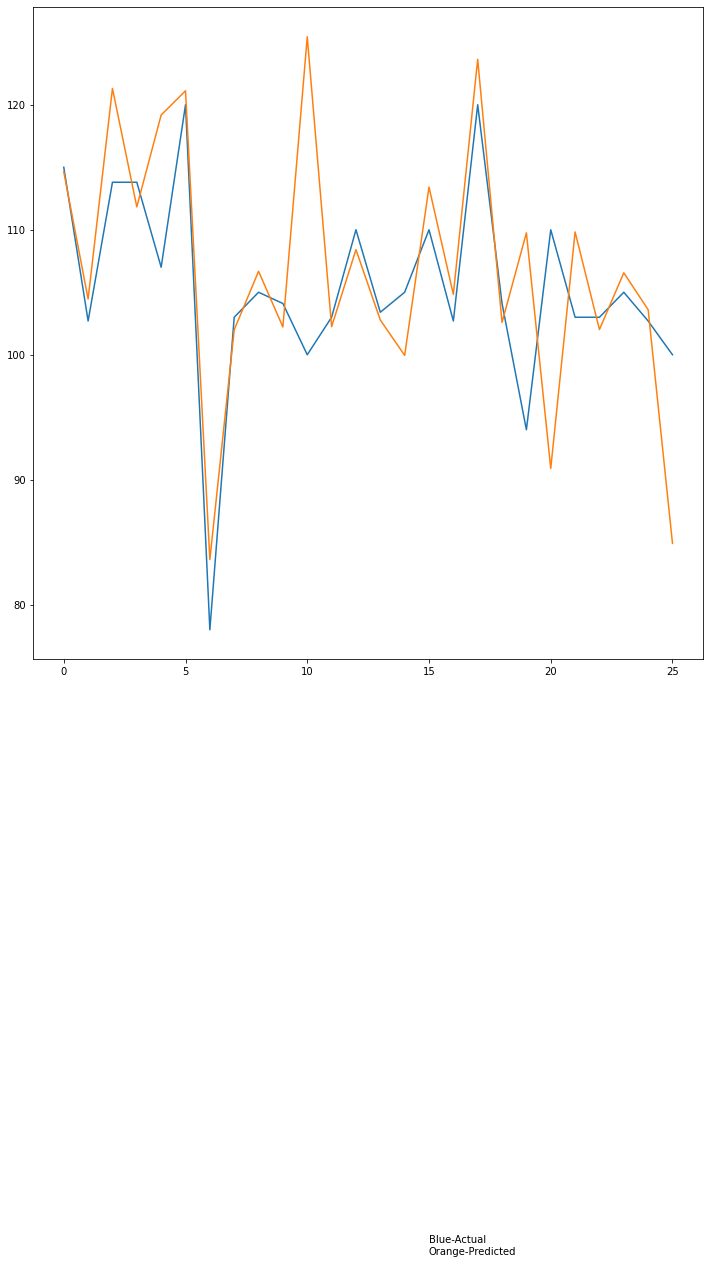

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
y11=comparison1[['Actual1','Predicted1']]
plt.text(15,28,'Blue-Actual \nOrange-Predicted')
plt.plot(y11)
plt.show

In [22]:
y2=Data['Ultimate Tensile(MPA)']
print(x.shape)
print(y2.shape)

(130, 33)
(130,)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x2train,x2test,y2train,y2test=train_test_split(x,y2,test_size=0.2)

In [24]:
print(x2train.shape)
print(y2train.shape)
print(x2test.shape)
print(y2test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [25]:
import statsmodels.api as sm
mod=sm.OLS(y2train,x2train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Ultimate Tensile(MPA)   R-squared:                       0.874
Model:                               OLS   Adj. R-squared:                  0.822
Method:                    Least Squares   F-statistic:                     16.87
Date:                   Sun, 30 Oct 2022   Prob (F-statistic):           2.63e-22
Time:                           20:36:56   Log-Likelihood:                -658.91
No. Observations:                    104   AIC:                             1380.
Df Residuals:                         73   BIC:                             1462.
Df Model:                             30                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(c) Heating     -0.9348      0.218     -4.291      0.000      -1.369      -0.501
Temperature(c) annealed    -0.0990      0.446     -0.222      0.825      -0.988       0.790
Temperature(c) aged        -0.0577      0.312     -0.185      0.854      -0.679       0.563
Temperature (c) ST          0.2842      0.258      1.103      0.273      -0.229       0.797
Carbon                  -1060.7455    769.752     -1.378      0.172   -2594.860     473.369
Hydrogen                  109.3300    842.009      0.130      0.897   -1568.791    1787.451
Iron                       76.7783     34.754      2.209      0.030       7.513     146.044
Nickel                     86.9556    119.162      0.730      0.468    -150.533     324.444
Nitrogen                 -245.1447    591.657     -0.414      0.680   -1424.316     934.027
Oxygen                    483.3238    361.148      1.338      0.185    -236.444    1203.091
Rutherium                5.352e-08   4.45e-08      1.204      0.233   -3.51e-08    1.42e-07
Titanium                   -2.3603     18.619     -0.127      0.899     -39.468      34.747
Palladium                -353.8432    522.721     -0.677      0.501   -1395.624     687.938
Molybdenum                 25.2416     23.744      1.063      0.291     -22.079      72.563
Aluminium                  54.5986     16.450      3.319      0.001      21.814      87.384
Vanadium                   21.4455     16.076      1.334      0.186     -10.595      53.486
Tin(sn)                    18.6966     28.048      0.667      0.507     -37.203      74.596
Niobium                    -1.4296     18.019     -0.079      0.937     -37.341      34.482
Tantallum                  11.5546     20.752      0.557      0.579     -29.804      52.913
Zirconium                  32.3304     14.204      2.276      0.026       4.023      60.638
Chromium                   29.7528     29.075      1.023      0.310     -28.194      87.699
Silicon                  -195.5233    456.427     -0.428      0.670   -1105.181     714.134
Bismuth                   347.7967    527.759      0.659      0.512    -704.026    1399.619
Copper                    -46.9055    180.256     -0.260      0.795    -406.156     312.345
Boron                    1904.4720   4860.581      0.392      0.696   -7782.652    1.16e+04
Yttrium                   317.4120    810.097      0.392      0.696   -1297.109    1931.933
Sulfur                   -1.31e+04   9811.713     -1.335      0.186   -3.27e+04    6456.775
Condition_Heating         723.6415   1800.878      0.402      0.689   -2865.504    4312.787
Condition_ST              269.9978   1847.081      0.146      0.884   -3411.230    3951.225
Condition_STA             614.3938   1841.341      0.334      0.740   -3055.393    4284.181
Condition_aged

In [26]:
predicted2=mod.predict(x2test)
predicted2=predicted2.astype(int)
data2=list(zip(y2test,predicted2))
comparison2=pd.DataFrame(data2,columns=['Actual2','Predicted2'])
print(comparison2)

    Actual2  Predicted2
0       152         184
1       275         310
2       950        1257
3       193         289
4      1080        1007
5      1200        1329
6       860         957
7       880        1141
8      1360        1259
9       990         970
10     1100        1234
11     1560        1310
12      775         832
13     1220        1418
14     1000        1173
15      345         455
16     1280        1202
17     1700        1263
18      344         364
19      124          80
20     1320        1172
21     1120        1290
22     1475        1316
23     1210        1298
24     1400        1300
25      510         540


In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse2=sqrt(mean_squared_error(y2test,predicted2))
rmse2

161.11044945340115

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
y12=comparison2[['Actual2','Predicted2']]
plt.text(15,150,'Blue-Actual \nOrange-Predicted')
plt.plot(y12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [46]:
y3=Data['Yield strength(MPA) (Max)']
print(x.shape)
print(y3.shape)

(130, 33)
(130,)


In [47]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x3train,x3test,y3train,y3test=train_test_split(x,y3,test_size=0.2)

In [48]:
print(x3train.shape)
print(y3train.shape)
print(x3test.shape)
print(y3test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [49]:
import statsmodels.api as sm
mod=sm.OLS(y3train,x3train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Yield strength(MPA) (Max)   R-squared:                       0.881
Model:                                   OLS   Adj. R-squared:                  0.832
Method:                        Least Squares   F-statistic:                     17.95
Date:                       Sun, 30 Oct 2022   Prob (F-statistic):           4.00e-23
Time:                               20:37:43   Log-Likelihood:                -656.72
No. Observations:                        104   AIC:                             1375.
Df Residuals:                             73   BIC:                             1457.
Df Model:                                 30                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(c) Heating     -0.7641      0.306     -2.499      0.015      -1.374      -0.155
Temperature(c) annealed    -0.0610      0.495     -0.123      0.902      -1.047       0.925
Temperature(c) aged        -0.2345      0.283     -0.830      0.409      -0.798       0.329
Temperature (c) ST          0.4114      0.225      1.831      0.071      -0.036       0.859
Carbon                  -1233.5000    716.425     -1.722      0.089   -2661.334     194.334
Hydrogen                  416.9951    818.200      0.510      0.612   -1213.675    2047.666
Iron                      106.1324     35.626      2.979      0.004      35.131     177.134
Nickel                      6.2709    115.991      0.054      0.957    -224.899     237.441
Nitrogen                 -161.2217    561.568     -0.287      0.775   -1280.425     957.981
Oxygen                    473.8035    365.111      1.298      0.198    -253.862    1201.469
Rutherium                1.078e-09   6.74e-10      1.599      0.114   -2.66e-10    2.42e-09
Titanium                    5.5656     15.539      0.358      0.721     -25.403      36.534
Palladium                -422.5554    455.488     -0.928      0.357   -1330.341     485.230
Molybdenum                 41.8025     19.662      2.126      0.037       2.616      80.989
Aluminium                  56.1782     15.492      3.626      0.001      25.303      87.054
Vanadium                   23.9722     14.151      1.694      0.095      -4.230      52.174
Tin(sn)                    34.6959     23.624      1.469      0.146     -12.387      81.779
Niobium                     5.5984     15.178      0.369      0.713     -24.652      35.848
Tantallum                  17.0774     18.780      0.909      0.366     -20.351      54.506
Zirconium                  28.9433     13.707      2.112      0.038       1.625      56.261
Chromium                   49.3984     25.566      1.932      0.057      -1.555     100.352
Silicon                  -266.7284    235.264     -1.134      0.261    -735.609     202.153
Bismuth                   381.1330    518.860      0.735      0.465    -652.954    1415.220
Copper                     17.0752    127.592      0.134      0.894    -237.215     271.366
Boron                    4990.1753   5214.629      0.957      0.342   -5402.565    1.54e+04
Yttrium                   831.6959    869.105      0.957      0.342    -900.428    2563.819
Sulfur                  -1.616e+04   9454.983     -1.709      0.092    -3.5e+04    2680.850
Condition_Heating        -207.0591   1509.601     -0.137      0.891   -3215.689    2801.571
Condition_ST             -705.4528   1570.907     -0.449      0.655   -3836.267    2425.361
Condition_STA            -278.6750   1560.878     -0.179      

In [50]:
predicted3=mod.predict(x3test)
predicted3=predicted3.astype(int)
data3=list(zip(y3test,predicted3))
comparison3=pd.DataFrame(data3,columns=['Actual3','Predicted3'])
print(comparison3)

    Actual3  Predicted3
0      1040        1160
1        90           4
2       900         958
3        90         130
4       830         822
5       138         215
6       980        1066
7      1210        1130
8      1340        1248
9      1300        1229
10     1250        1137
11       76           3
12      825        1023
13      730         720
14      860        1218
15      480         479
16      900         913
17       62         -40
18      340         344
19      930         990
20     1100        1257
21     1100         998
22      415         388
23     1210        1216
24      380         435
25      590         460


In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse3=sqrt(mean_squared_error(y3test,predicted3))
rmse3

110.1664824080076

<function matplotlib.pyplot.show(close=None, block=None)>

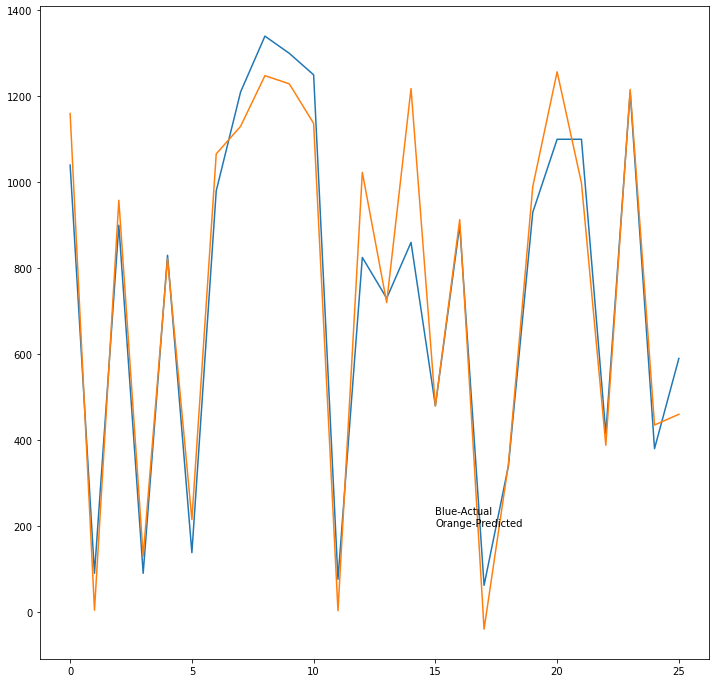

In [52]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
y13=comparison3[['Actual3','Predicted3']]
plt.text(15,200,'Blue-Actual \nOrange-Predicted')
plt.plot(y13)
plt.show

In [36]:
y4=Data['Elongation(%)']
print(x.shape)
print(y4.shape)

(130, 33)
(130,)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x4train,x4test,y4train,y4test=train_test_split(x,y4,test_size=0.2)

In [38]:
print(x4train.shape)
print(y4train.shape)
print(x4test.shape)
print(y4test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [39]:
import statsmodels.api as sm
mod=sm.OLS(y4train,x4train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Elongation(%)   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     6.085
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           1.60e-10
Time:                        20:36:57   Log-Likelihood:                -300.38
No. Observations:                 104   AIC:                             662.8
Df Residuals:                      73   BIC:                             744.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(c) Heating      0.0096      0.008      1.193      0.237      -0.006       0.026
Temperature(c) annealed    -0.0097      0.013     -0.726      0.470      -0.036       0.017
Temperature(c) aged        -0.0006      0.010     -0.062      0.951      -0.020       0.018
Temperature (c) ST         -0.0081      0.007     -1.114      0.269      -0.023       0.006
Carbon                     23.1509     23.685      0.977      0.332     -24.053      70.355
Hydrogen                  -57.0637     28.679     -1.990      0.050    -114.220       0.093
Iron                       -0.2114      1.183     -0.179      0.859      -2.569       2.146
Nickel                      3.6798      3.600      1.022      0.310      -3.496      10.855
Nitrogen                   11.8524     18.558      0.639      0.525     -25.133      48.838
Oxygen                    -15.4261     10.848     -1.422      0.159     -37.047       6.195
Rutherium                 2.48e-09   2.32e-09      1.070      0.288   -2.14e-09     7.1e-09
Titanium                    0.3934      0.495      0.794      0.430      -0.594       1.381
Palladium                   1.5775     14.082      0.112      0.911     -26.487      29.642
Molybdenum                  0.0706      0.620      0.114      0.910      -1.165       1.306
Aluminium                  -0.7099      0.486     -1.459      0.149      -1.679       0.260
Vanadium                   -0.1577      0.449     -0.352      0.726      -1.052       0.736
Tin(sn)                     0.0830      0.759      0.109      0.913      -1.429       1.595
Niobium                     0.3335      0.481      0.693      0.490      -0.625       1.292
Tantallum                  -0.0839      0.578     -0.145      0.885      -1.236       1.068
Zirconium                  -0.9470      0.444     -2.131      0.036      -1.833      -0.061
Chromium                    0.7109      0.785      0.906      0.368      -0.854       2.275
Silicon                     0.0308      7.585      0.004      0.997     -15.087      15.148
Bismuth                    -2.1721     16.663     -0.130      0.897     -35.381      31.037
Copper                      1.6255      5.570      0.292      0.771      -9.476      12.727
Boron                     -41.0460    166.832     -0.246      0.806    -373.542     291.451
Yttrium                    -6.8410     27.805     -0.246      0.806     -62.257      48.575
Sulfur                    372.9076    354.609      1.052      0.296    -333.828    1079.643
Condition_Heating         -12.9358     48.070     -0.269      0.789    -108.739      82.867
Condition_ST               -1.4173     49.587     -0.029      0.977    -100.244      97.410
Condition_STA             -10.4022     49.546     -0.210      0.834    -109.147      88.343
Condition_aged            -11.9571     49.571  

In [40]:
predicted4=mod.predict(x4test)
predicted4=predicted4.astype(int)
data4=list(zip(y4test,predicted4))
comparison4=pd.DataFrame(data4,columns=['Actual4','Predicted4'])
print(comparison4)

    Actual4  Predicted4
0      20.0          23
1      13.0           8
2       3.0          12
3       6.0          16
4       9.0          15
5      17.0          21
6       8.0           8
7      40.0          27
8      14.0          15
9       6.0          11
10     20.0          22
11     13.0          10
12      3.0          12
13      2.0           9
14     32.0          28
15     15.0          11
16     15.3           6
17      6.0           5
18      4.0           8
19     18.0          10
20     24.0          29
21     20.0          25
22     14.0           7
23      6.0          10
24      7.0          17
25     11.0           6


In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse4=sqrt(mean_squared_error(y4test,predicted4))
rmse4

6.33819314218905

<function matplotlib.pyplot.show(close=None, block=None)>

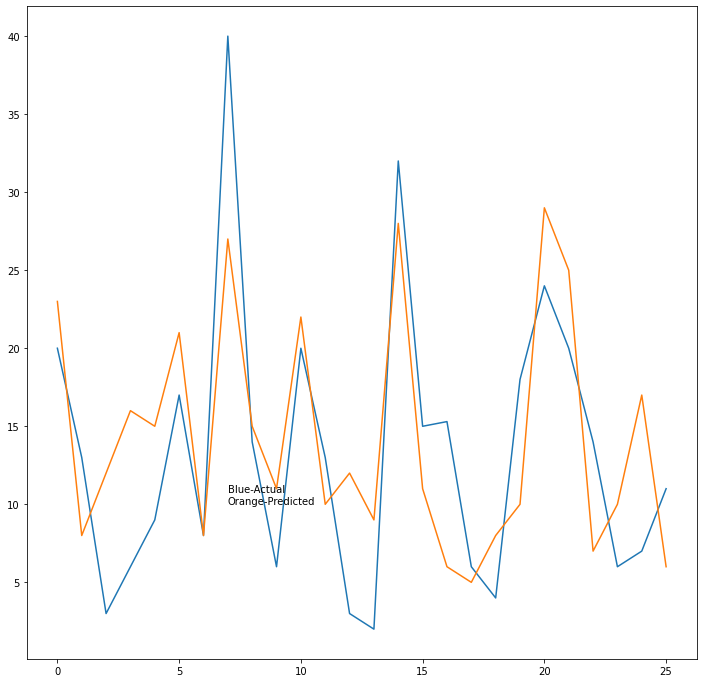

In [42]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
y14=comparison4[['Actual4','Predicted4']]
plt.text(7,10,'Blue-Actual \nOrange-Predicted')
plt.plot(y14)
plt.show

In [53]:
Columns={'Parameters':['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'],
        'LRerror':[rmse1,rmse2,rmse3,rmse4]}
joins2=pd.DataFrame(Columns)
joins1=pd.read_excel('errors.xlsx')
joins3=joins1.merge(joins2, left_on='Parameters', right_on='Parameters',how='inner')

In [54]:
joins4=pd.read_excel('Errors1.xlsx')
joins5=joins3.merge(joins4, left_on='Parameters', right_on='Parameters',how='inner')
joins6=pd.read_excel('errors2.xlsx')
innerjoin=joins5.merge(joins6, left_on='Parameters', right_on='Parameters',how='inner')
innerjoin.to_excel('Biomaterial_optimization_errors.xlsx')

In [55]:
joins2

Parameters     LRerror
0      Elastic Modulus (GPA)    8.436815
1      Ultimate Tensile(MPA)  161.110449
2  Yield strength(MPA) (Max)  110.166482
3              Elongation(%)    6.338193